# Reinforcement Learning with  TF Agents

Inspired by: "Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems", 2nd Edition by Aurélien Géron, O'Reilly

https://github.com/ageron/handson-ml2

## Setup

In [8]:
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Intro to OpenAI gym

In [9]:
import gym

In [10]:
# List available environments
gym.envs.registry.all()

ValuesView(├──ALE
│   ├──ALE/Tetris: [ v5 ]
│   ├──ALE/Tetris-ram: [ v5 ]
│   ├──ALE/Adventure: [ v5 ]
│   ├──ALE/Adventure-ram: [ v5 ]
│   ├──ALE/AirRaid: [ v5 ]
│   ├──ALE/AirRaid-ram: [ v5 ]
│   ├──ALE/Alien: [ v5 ]
│   ├──ALE/Alien-ram: [ v5 ]
│   ├──ALE/Amidar: [ v5 ]
│   ├──ALE/Amidar-ram: [ v5 ]
│   ├──ALE/Assault: [ v5 ]
│   ├──ALE/Assault-ram: [ v5 ]
│   ├──ALE/Asterix: [ v5 ]
│   ├──ALE/Asterix-ram: [ v5 ]
│   ├──ALE/Asteroids: [ v5 ]
│   ├──ALE/Asteroids-ram: [ v5 ]
│   ├──ALE/Atlantis: [ v5 ]
│   ├──ALE/Atlantis-ram: [ v5 ]
│   ├──ALE/Atlantis2: [ v5 ]
│   ├──ALE/Atlantis2-ram: [ v5 ]
│   ├──ALE/Backgammon: [ v5 ]
│   ├──ALE/Backgammon-ram: [ v5 ]
│   ├──ALE/BankHeist: [ v5 ]
│   ├──ALE/BankHeist-ram: [ v5 ]
│   ├──ALE/BasicMath: [ v5 ]
│   ├──ALE/BasicMath-ram: [ v5 ]
│   ├──ALE/BattleZone: [ v5 ]
│   ├──ALE/BattleZone-ram: [ v5 ]
│   ├──ALE/BeamRider: [ v5 ]
│   ├──ALE/BeamRider-ram: [ v5 ]
│   ├──ALE/Berzerk: [ v5 ]
│   ├──ALE/Berzerk-ram: [ v5 ]
│   ├──ALE/Blackjack: [ 

In [11]:
# The Cart-Pole is a very simple environment composed of a cart that can move left or right, and pole placed vertically on top of it. The agent must move the cart left or right to keep the pole upright.
env = gym.make('CartPole-v1')

In [12]:
# Let's initialize the environment by calling is `reset()` method. This returns an observation:
env.seed(42)
obs = env.reset()

In [13]:
# Observations vary depending on the environment. 
# In this case it is a 1D NumPy array composed of 4 floats: 
# they represent the cart's horizontal position, its velocity, the angle of the pole (0 = vertical), and the angular velocity.
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [14]:
# An environment can be visualized by calling its render() method, and you can pick the rendering mode (the rendering options depend on the environment).

# try:
#     import pyvirtualdisplay
#     display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
# except ImportError:
#     pass

# env.render()

In [15]:
img = env.render(mode='rgb_array')
img.shape

(400, 600, 3)

In [16]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode='rgb_array')
    plt.imshow(img)
    plt.axis('off')
    return img

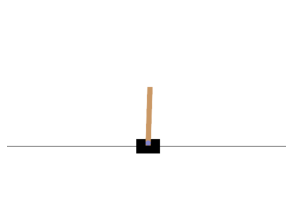

In [17]:
plot_environment(env)
plt.show()

In [18]:
# Let's see how to interact with an environment. Your agent will need to select an action from an "action space" (the set of possible actions). Let's see what this environment's action space looks like:
env.action_space

Discrete(2)

In [19]:
# Yep, just two possible actions: accelerate towards the left or towards the right.
action = 1 # towards the right
obs, reward, done, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

Saving figure cart_pole_plot


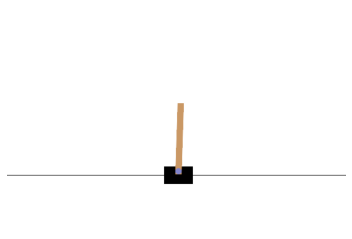

In [20]:
plot_environment(env)
save_fig('cart_pole_plot')

In [21]:
# The environment also tells the agent how much reward it got during the last step:
print(reward)
# When the game is over, the environment returns done=True:
print(done)
# Finally, info is an environment-specific dictionary that can provide some extra information that you may find useful for debugging or for training. For example, in some games it may indicate how many lives the agent has.
print(info)

1.0
False
{}


In [22]:
# The sequence of steps between the moment the environment is reset until it is done is called an "episode". At the end of an episode (i.e., when step() returns done=True), you should reset the environment before you continue to use it.
if done:
    env.reset()

## Using TF Agents to beat Breakout

In [23]:
tf.random.set_seed(42)
np.random.seed(42)

In [24]:
from tf_agents.environments import suite_gym

In [27]:
env = suite_gym.load("Breakout-v4")
env

In [28]:
env.gym

<TimeLimit<OrderEnforcing<AtariEnv<Breakout-v4>>>>

In [29]:
env.seed(42)
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(0)})

In [30]:
env.step(1) # fire

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1)})

Saving figure breakout_plot


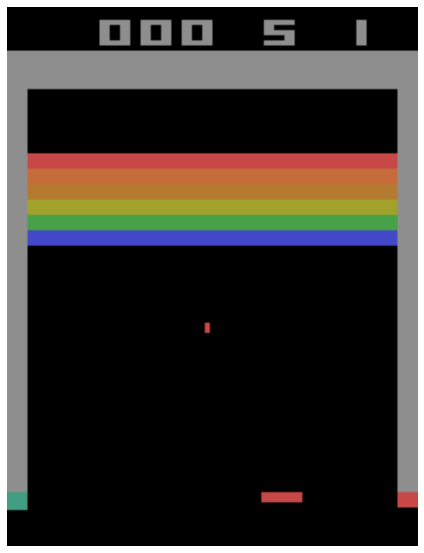

In [31]:
img = env.render(mode='rgb_array')

plt.figure(figsize=(6,8))
plt.imshow(img)
plt.axis('off')
save_fig('breakout_plot')
plt.show()

In [32]:
env.current_time_step()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1)})

### Environment specifications

In [34]:
env.observation_spec()

BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255)

In [35]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)

In [36]:
env.time_step_spec()

TimeStep(
{'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')})

### Environment wrappers

In [37]:
from tf_agents.environments.wrappers import ActionRepeat

repeating_env = ActionRepeat(env, times=4)
repeating_env

In [38]:
repeating_env.unwrapped

In [39]:
# list of available wrappers
import tf_agents.environments.wrappers

for name in dir(tf_agents.environments.wrappers):
    obj = getattr(tf_agents.environments.wrappers, name)
    if hasattr(obj, '__base__') and issubclass(obj, tf_agents.environments.wrappers.PyEnvironmentBaseWrapper):
        print("{:27s} {}".format(name, obj.__doc__.split("\n")[0]))

ActionClipWrapper           Wraps an environment and clips actions to spec before applying.
ActionDiscretizeWrapper     Wraps an environment with continuous actions and discretizes them.
ActionOffsetWrapper         Offsets actions to be zero-based.
ActionRepeat                Repeates actions over n-steps while acummulating the received reward.
ExtraDisabledActionsWrapper Adds extra unavailable actions.
FixedLength                 Truncates long episodes and pads short episodes to have a fixed length.
FlattenActionWrapper        Flattens the action.
FlattenObservationsWrapper  Wraps an environment and flattens nested multi-dimensional observations.
GoalReplayEnvWrapper        Adds a goal to the observation, used for HER (Hindsight Experience Replay).
HistoryWrapper              Adds observation and action history to the environment's observations.
ObservationFilterWrapper    Filters observations based on an array of indexes.
OneHotActionWrapper         Converts discrete action to one_h

In [40]:
# The suite_gym.load() function can create an env and wrap it for you, both with TF-Agents environment wrappers and Gym environment wrappers (the latter are applied first).
from functools import partial
from gym.wrappers import TimeLimit

limited_repeating_env = suite_gym.load(
    'Breakout-v4',
    gym_env_wrappers=[partial(TimeLimit, max_episode_steps=10000)],
    env_wrappers=[partial(ActionRepeat, times=4)],
)

limited_repeating_env

In [42]:
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4

max_episode_steps = 27000
environment_name = "BreakoutNoFrameskip-v4"

class AtariPreprocessingWithAutoFire(AtariPreprocessing):
    def reset(self, **kwargs):
        obs = super().reset(**kwargs)
        super().step(1) # FIRE to start
        return obs
    def step(self, action):
        lives_before_action = self.ale.lives()
        obs, rewards, done, info = super().step(action)
        if self.ale.lives() < lives_before_action and not done:
            super().step(1) # FIRE to start after life lost
        return obs, rewards, done, info

env = suite_atari.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessingWithAutoFire, FrameStack4])

In [43]:
env

In [44]:
env.seed(42)
env.reset()
for _ in range(4):
    time_step = env.step(3) # LEFT

In [45]:
def plot_observation(obs):
    # Since there are only 3 color channels, you cannot display 4 frames
    # with one primary color per frame. So this code computes the delta between
    # the current frame and the mean of the other frames, and it adds this delta
    # to the red and blue channels to get a pink color for the current frame.
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(axis=-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis("off")

Saving figure preprocessed_breakout_plot


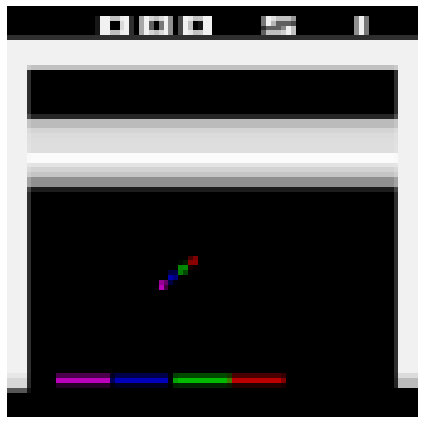

In [46]:
plt.figure(figsize=(6, 6))
plot_observation(time_step.observation)
save_fig("preprocessed_breakout_plot")
plt.show()

In [47]:
# Convert the Python environment to a TF environment:
from tf_agents.environments.tf_py_environment import TFPyEnvironment
tf_env = TFPyEnvironment(env)

### Creating the DQN